<a href="https://colab.research.google.com/github/pmgumble/DSA/blob/main/Searching_%26_Sorting(W_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##Analysis of Algorithms

> Measuring Performance 


1.   Runnig Time : Time complexity
2.   Memory reqirnment : space complexity


Running time depends on input size, Larger arrays will take longer to sort

<br> Measure time efficiency as function of input size


*   Input size n
*Running time t(n)


---


Orders of Magintude
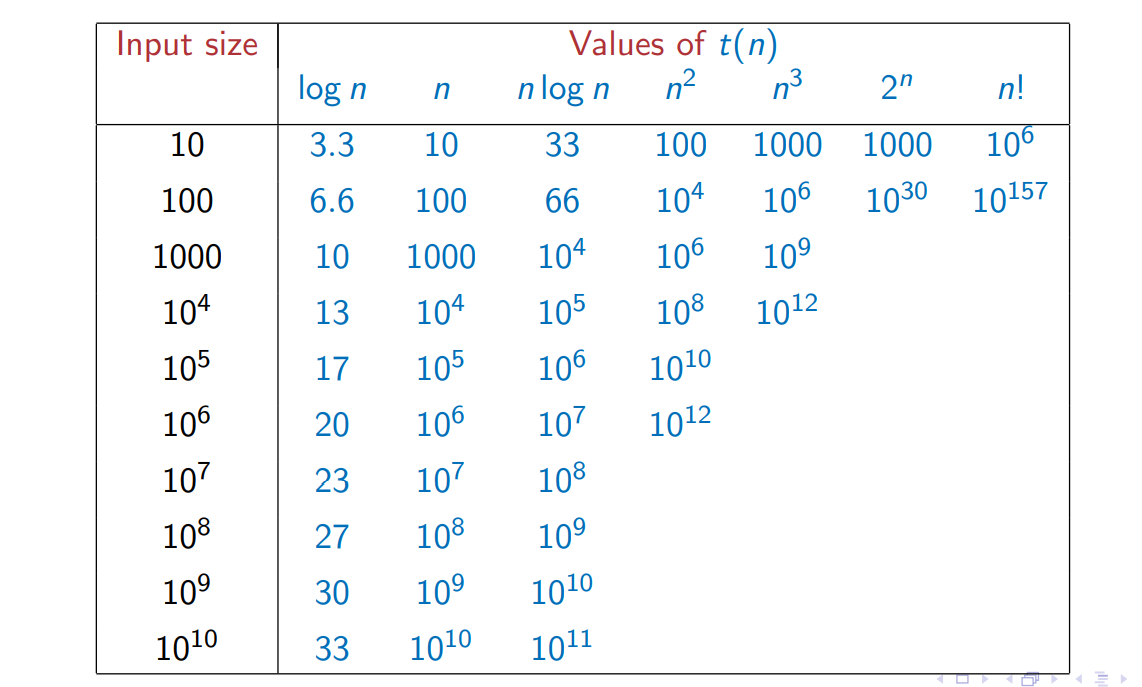





Two important parameters when measuring algorithm performance
* Running time, memory requirement (space)

We mainly focus on time
* Running time t(n) is a function of input size n Interested in orders of magnitude Asymptotic complexity, as n becomes large
From running time, we can estimate feasible input sizes

* We focus on worst case inputs Pessimistic, but easier to calculate than average case Upper bound on worst case gives us an overall guarantee on performance

## W2 

# Orders of magnitude

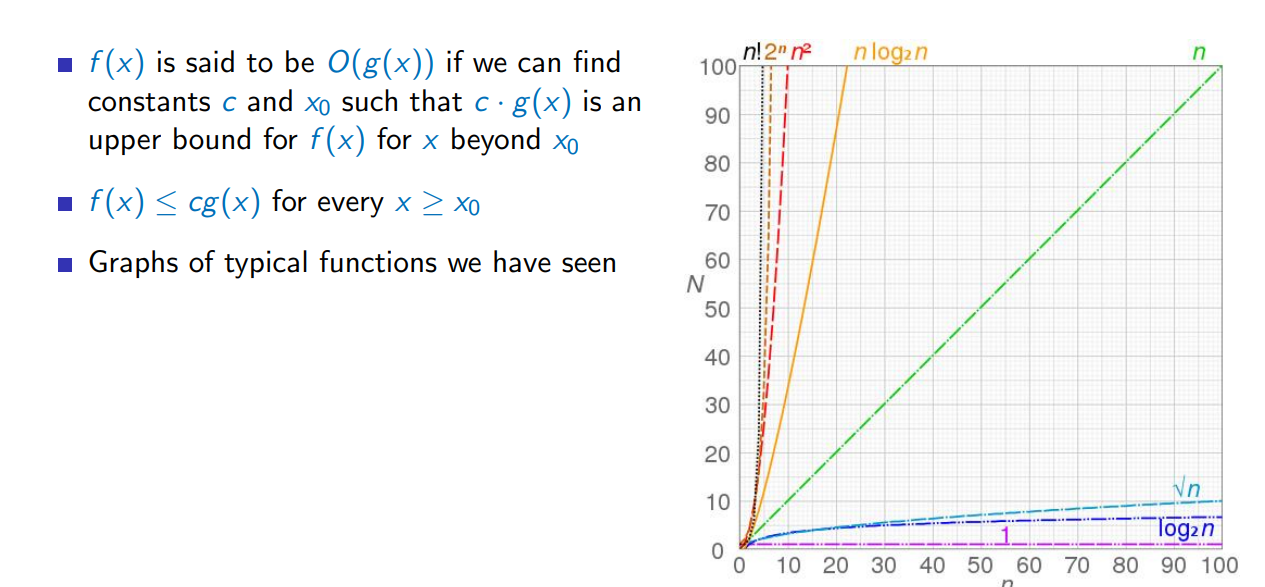

> * f (n) is O(g(n)) means g(n) is an upper bound for f (n)
> * Useful to describe asymptotic worst case running time
f (n) is Ω(g(n)) means g(n) is a lower bound for f (n)
> * Typically used for a problem as a whole, rather than an individual algorihm
f (n) is Θ(g(n)): matching upper and lower bounds We have found an optimal algorithm for a problem

## l-3

### Calculating Complexity
Find the maximum element in a list
* Input size is length of the list
* Single loop scans all elements
* Always takes n steps
* Overall time is O(n)



```
def maxElement(L):
  maxval = L[0]
    for i in range(len(L)):
      if L[i] > maxval:
        maxval = L[i]
  return(maxval)
```


---


Example - 2
<br> Check whether a list contains duplicates


```
def noDuplicates(L):
  for i in range(len(L)):
    for j in range(i+1,len(L)):
      if L[i] == L[j]:
        return(False)
  return(True)
```
* Input size is length of the list
* Nested loop scans all pairs of elements
* A duplicate may be found in the very first iteration
* Worst case — no duplicates, both loops run fully
* Time is
(n − 1) + (n − 2) + . . . + 1 = n(n − 1)/2
* Overall time is O(n2)


---

Example 3 

Matrix multiplication

* Matrix is represented as list of lists

* ( 1 2 3
 <br>  4 5 6 )
* [[1,2,3],[4,5,6]]
* Input matrices have size m × n, n × p
* Output matrix is m × p
* Three nested loops
* Overall time is O(mnp) — O(n3) if both are n × n



```
def matrixMultiply(A,B):
  (m,n,p) = (len(A),len(B),len(B[0]))
  C = [[ 0 for i in range(p) ] for j in range(m) ]
  for i in range(m):
    for j in range(p):
      for k in range(n):
        C[i][j] = C[i][j] + A[i][k]*B[k][j]
  return(C)

```
---

Example 4

Number of bits in binary representation of n



```
def numberOfBits(n):
  count = 1
  while n > 1:
    count = count + 1
    n = n // 2
  return(count)
```
* log n steps for n to reach 
* For number theoretic problems, input
size is number of digits
* This algorithm is linear in input size







Lecture 4

**Searching in a list**

<br> Naive solution scans the list


```
def naivesearch(v,l):
  for x in l:
    if v == x:
      return(True)
  return(False)

```

* Is value v present in list l?
* Naive solution scans the list
* Input size n, the length of the list
* Worst case is when v is not present in l
* Worst case complexity is O(n)



---

## Searching a sorted list
* What if l is sorted in ascending order?
* Compare v with the midpoint of l
> * If midpoint is v, the value is found
> * If v less than midpoint, search the first half
> * If v greater than midpoint, search the second half
> *Stop when the interval to search becomes empty





In [ ]:
def binarysearch(v,l):
  if l == []:
    return(False)
  m = len(l)//2

  if v == l[m]:
    return(True)
  if v < l[m]:
    return(binarysearch(v,l[:m]))
  else:
    return(binarysearch(v,l[m+1:]))

**Binary Search**

* How long does this take?
>* Each call halves the interval to search
Stop when the interval become empty
>* log n — number of times to divide n by
2 to reach 1
>* 1 // 2 = 0, so next call reaches empty
interval
>* O(log n) steps


> * Search in an unsorted list takes time O(n)
      > * Need to scan the entire list
      > * Worst case is when the value is not present in the list
      > * For a sorted list, binary search takes time O(log n)
      > * Halve the interval to search each time
      > * In a sorted list, we can determine that v is absent by examining just log n values!


# L-5

## Selection Sort

*How do we sort a list?*

1.   Scan the entire pile and find the paper with minimum marks
2.   Move this paper to a new pile
3.   Repeat with the remaining papers
    * Add the paper with next minimum marks to the second pile each time
4.  Eventually, the new pile is sorted in descending order




---


* Select the next element in sorted order
* Append it to the final sorted list
* Avoid using a second list
  >* Swap the minimum element into
the first position
  >* Swap the second minimum element
into the second position
  >* ...
  >* Eventually the list is rearranged in
place in ascending order



Analysis of selection sort
T(n) is O(n**2)

* Every input takes this much time
* No advantage even if list is arranged carefully before sorting





In [ ]:
def SelectionSort(L):
  n = len(L)
  if n < 1:
    return(L)
  for i in range(n):
    # Assume L[:i] is sorted
    mpos = i
    # mpos: position of minimum in L[i:]
    for j in range(i+1,n):
      if L[j] < L[mpos]:
        mpos = j
    # L[mpos] : smallest value in L[i:]
    # Exchange L[mpos] and L[i]
    (L[i],L[mpos]) = (L[mpos],L[i])
    # Now L[:i+1] is sorted
  return(L)

# L-6 Insertion Sort

**Sorting a list**
 

1.   Move the first paper to a new pile
2.Second paper
   * Lower marks than first paper? Place below first paper in new pile
   * Higher marks than first paper? Place above first paper in new pile
3.Third paper
  * **Insert** into correct position with respect to first two
4. Do this for the remaining papers
  * **Insert** each one into correct position in the second pile

**STEPS**

1.   Start building a new sorted list
2.   Pick next element and insert it into the sorted list
3.   An iterative formulation
    * Assume L[:i] is sorted
    * Insert L[i] in L[:i]

4. A recursive formulation
    * Inductively sort L[:i]
    * Insert L[i] in L[:i]

T(n) is O(n**2)



In [ ]:
def InsertionSort(L):
  n = len(L)
  if n < 1:
    return(L)
  for i in range(n):
    # Assume L[:i] is sorted
    # Move L[i] to correct position in L
    j = i
    while(j > 0 and L[j] < L[j-1]):
      (L[j],L[j-1]) = (L[j-1],L[j])
      j = j-1
      # Now L[:i+1] is sorted
  return(L)

In [ ]:
def Insert(L,v):
  n = len(L)
  if n == 0:
    return([v])
  if v >= L[-1]:
    return(L+[v])
  else:
    return(Insert(L[:-1],v)+L[-1:])

def ISort(L):
  n = len(L)
  if n < 1:
    return(L)
  L = Insert(ISort(L[:-1]),L[-1])
  return(L)



# L-7
**Merge Sort**

* Divide the list into two halves 
* Separately sort the left and right half
* Combine the two sorted halves to get a fully sorted list
* Combine two sorted lists A and B into a
single sorted list C
  * Compare first elements of A and B
  * Move the smaller of the two to C
  * Repeat till you exhaust A and B


---


Merging A and B

*Merge sort*

* Let n be the length of L
* Sort A[:n//2]
* Sort A[n//2:]
* Merge the sorted halves into B
* How do we sort
A[:n//2] and
A[n//2:]?
  * Recursively, same
strategy!

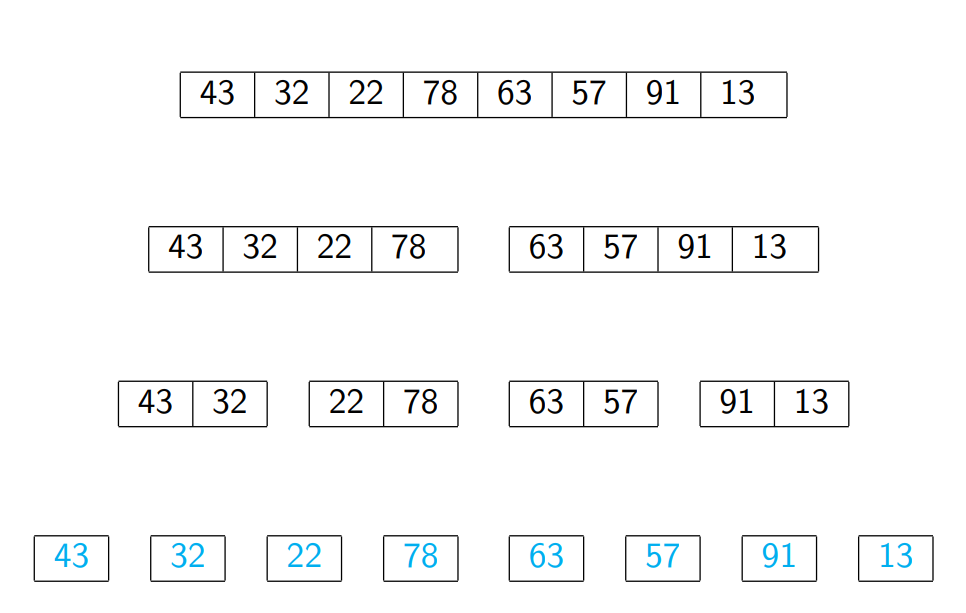




Divide and Conquer
* Break up the problem into disjoint parts
* Solve each part separately
* Combine the solutions efficiently


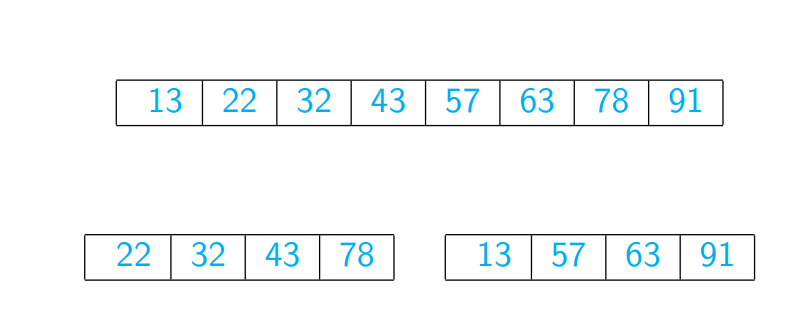

* Combine two sorted lists A and B into C
  * If A is empty, copy B into C
  * If B is empty, copy A into C
  * Otherwise, compare first elements of A and B
    * Move the smaller of the two to C
  * Repeat till all elements of A and B have been moved


In [ ]:
def merge(A,B):
  (m,n) = (len(A),len(B))
  (C,i,j,k) = ([],0,0,0)
  while k < m+n:
    if i == m:
      C.extend(B[j:])
      k = k + (n-j)
    elif j == n:
      C.extend(A[i:])
      k = k + (m-i)
    elif A[i] < B[j]:
      C.append(A[i])
      (i,k) = (i+1,k+1)
    else:
      C.append(B[j])
      (j,k) = (j+1,k+1)
  return(C)







**Merge sort**



*   To sort A into B, both of length n
* If n ≤ 1, nothing to be done
* oyherwise
  * Sort A[:n//2] into L
  * Sort A[n//2:] into R
  * Merge L and R into B



In [ ]:
def mergesort(A):
  n = len(A)
  if n <= 1:
    return(A)
  L = mergesort(A[:n//2])
  R = mergesort(A[n//2:])
  B = merge(L,R)
  return(B)

**Merge sort takes time O(n log n) so can be used effectively on large inputs**

#PPA1 
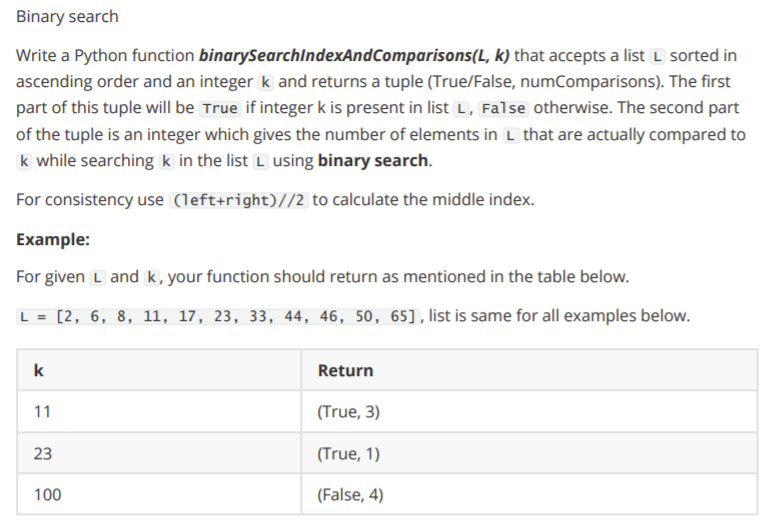

In [ ]:
def binarySearchIndexAndComparisons(L, k, count=0):
  if L == []:
    return(False, count)
  m = len(L)//2
  
  if k == L[m]:
    return(True, count)
  if k < L[m]:
    return(binarySearchIndexAndComparisons(L[:m], k, count+1))
  else:
    return(binarySearchIndexAndComparisons(L[m+1:], k, count+1))



In [ ]:
print(binarySearchIndexAndComparisons([2,6,8,11,17,23,33,44,46,50,65,99,100],100))

(True, 2)


In [ ]:
def Binarysearch(L, k):
  n = len(L)
  if L == []:
    return False
  m = n//2
  if k ==L[m]:
    return True

  if k < L[m]:
    return (Binarysearch(L[:m], k))
  else:
    return (Binarysearch(L[m+1:], k))



# PPA2
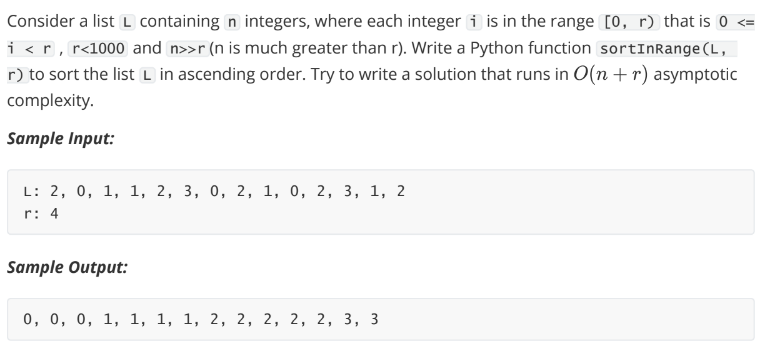

In [ ]:
def merge(A,B):
  (m,n) = (len(A),len(B))
  (C,i,j,k) = ([],0,0,0)
  while k < m+n:
    if i == m:
      C.extend(B[j:])
      k = k + (n-j)
    elif j == n:
      C.extend(A[i:])
      k = k + (m-i)
    elif A[i] < B[j]:
      C.append(A[i])
      (i,k) = (i+1,k+1)
    else:
      C.append(B[j])
      (j,k) = (j+1,k+1)
  return(C)

In [ ]:
def sortInRange(A, r):
  n = len(A)
  if n <= 1:
    return (A)
  L = sortInRange(A[:n//2],r)
  R = sortInRange(A[n//2:],r)
  B = merge(L,R)
  return(B)


In [ ]:
print(sortInRange([2,0,1,1,2,3,2,10,2,3,1,2,8],4))

[0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 8, 10]


## GRPA 1 

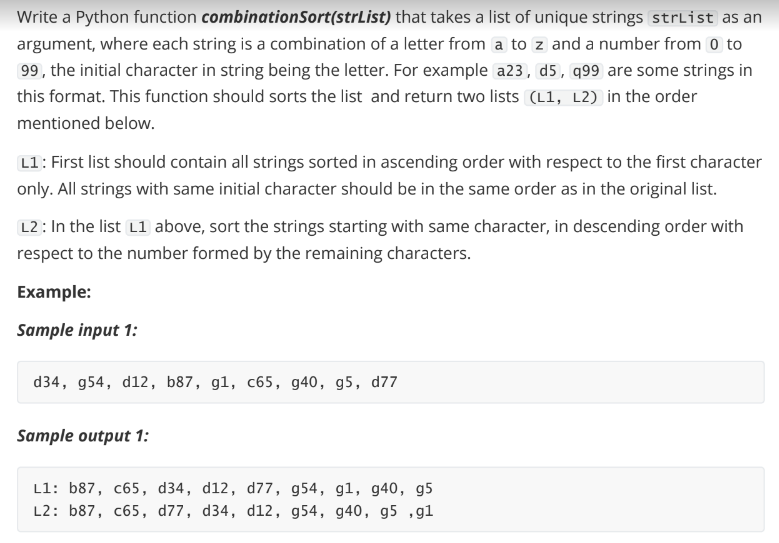

In [ ]:
def combinationSort(strList):
  n = len(strList)
  if n < 1:
    return (strList)
  for i in range(n):
    # Assume L[:i] is sorted
      mpos = i
      # mpos is position of minimum in L[i:]
      for j in range(i+1, n):
        if strList[j][0] < strList[mpos][0]:
          mpos = j
        # L[mpos] is the smallest value in L[i:]
      (strList[i],strList[mpos]) = (strList[mpos],strList[i])
      # Now L[:i+1] is sorted
  return(strList)


In [ ]:
print(combinationSort(strList))

['a19', 'd34', 'g31', 'g18', 'g9', 'g1']


In [ ]:
strList = ['d34', 'g31', 'g18', 'a19', 'g1', 'g9']

In [ ]:
def Sorted(newstrList):
  n = len(newstrList)
  for i in range(n):
    mpos = i
    for j in range(i+1, n):
      if newstrList[j][0] == newstrList[mpos][0]:
        if int(newstrList[j][1:]) > int(newstrList[mpos][1:]):
          (newstrList[i],newstrList[mpos]) = (newstrList[mpos],newstrList[i])
          mpos = j
    else:
      (newstrList[i],newstrList[mpos]) = (newstrList[mpos],newstrList[i])
      mpos = j
  return(newstrList)

    





In [ ]:
print(Sorted(strList))

['d34', 'g31', 'g18', 'a19', 'g9', 'g1']


In [ ]:
# Portal Solution

import string 
def combinationSort(strList):
  # Create a dictionary with 26 keys from characters 'a' to 'z', each key has an empty list as value.
  groups = {k: [] for k in string.ascii_lowercase}
   # Using this dictionary to group strings with same initial character.  
  for i in range(len(strList)):
    char=strList[i][0]
    groups[char].append(strList[i])
  
  strList=[]
  # Recreate the list from all the strings in groups, iterating on groups from a to z.
  for char in groups.keys():
    for s in groups[char]:
      strList.append(s)
  
  L1 = strList.copy() # Saving intermediate result to return later.
  i = 1
  left = 0
  # As there can be no more than 100 strings with same initial character.
  # Using insertion sort within group.
  while i<len(strList):
    right = i
    while(right>left and strList[right][0] == strList[right-1][0] and int(strList[right-1][1:])<int(strList[right][1:])):
      strList[right], strList[right-1] = strList[right-1], strList[right]
      right -= 1
    i += 1
  
  return L1, strList


## GRPA 2

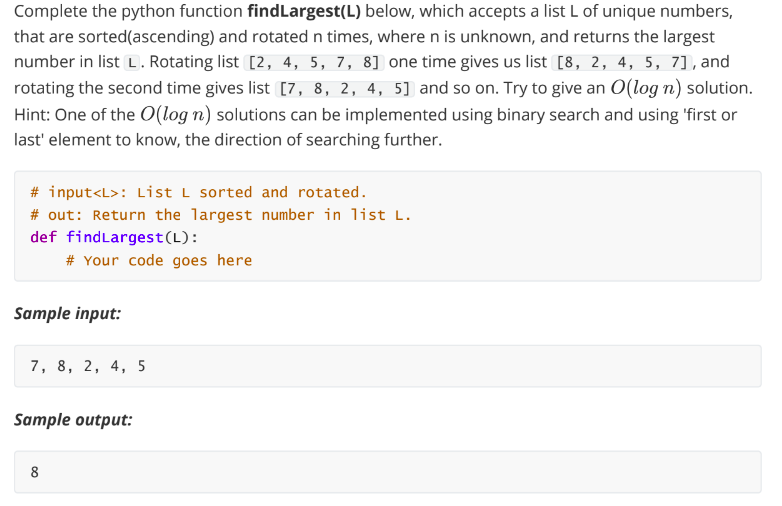

**Approach**: 
1. A simple solution is to traverse the complete array and find maximum. This solution requires O(n) time. 

2. We can do it in O(Logn) using Binary Search. If we take a closer look at above examples, we can easily figure out the following pattern: 

* The maximum element is the only element whose next is smaller than it. If there is no next smaller element, then there is no rotation (last element is the maximum). We check this condition for middle element by comparing it with elements at mid – 1 and mid + 1.
* If maximum element is not at middle (neither mid nor mid + 1), then maximum element lies in either left half or right half. 
  1. If middle element is greater than the last element, then the maximum element lies in the left half.
  2. Else maximum element lies in the right half.

In [ ]:
# Portal Solution 
def findLargest(L):
  left = 0
  s = len(L)
  right = s-1
  
  # If list has only one element, that is the max.
  if (s==1):
    return L[0]
    
  while (left<=right):
    mid=(left+right)//2
    
    # if mid is at last index, next element to compare will be at index 0
    if (mid == s-1):
      nextToMid = 0
    else:
      nextToMid = mid+1

    if (L[mid] > L[nextToMid]):
      return L[mid]
    elif (L[mid] < L[0]):
      # our element is in left of mid
      right = mid-1
    else:
      # our element is in right of mid
      left = mid+1

In [ ]:
# Approch-2

def findLargest(L):
    n = len(L)
    upper = n-1
    lower = 0
    mid = 0
     
    while n >= 2:
        
        mid = (upper + lower)//2
        
        if upper == lower:
          break

        elif L[mid] > L[mid+1] and L[mid] >= L[lower]:
            return L[mid]
        
        elif L[mid] < L[mid+1] and L[mid] >= L[lower]:
            lower = mid+1
                    
        elif L[mid] < L[mid+1] and L[mid] < L[lower]:
            upper = mid
        
        n -= 1
    
    mid = (upper + lower)//2
    return (L[mid])

In [ ]:
l = [1,2,3,4,5]
print(l[-1:])

[5]


In [ ]:
#GRPA 3



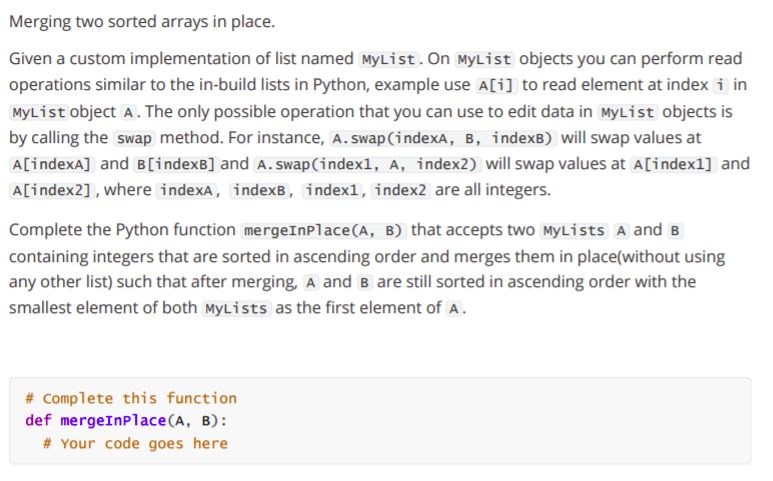


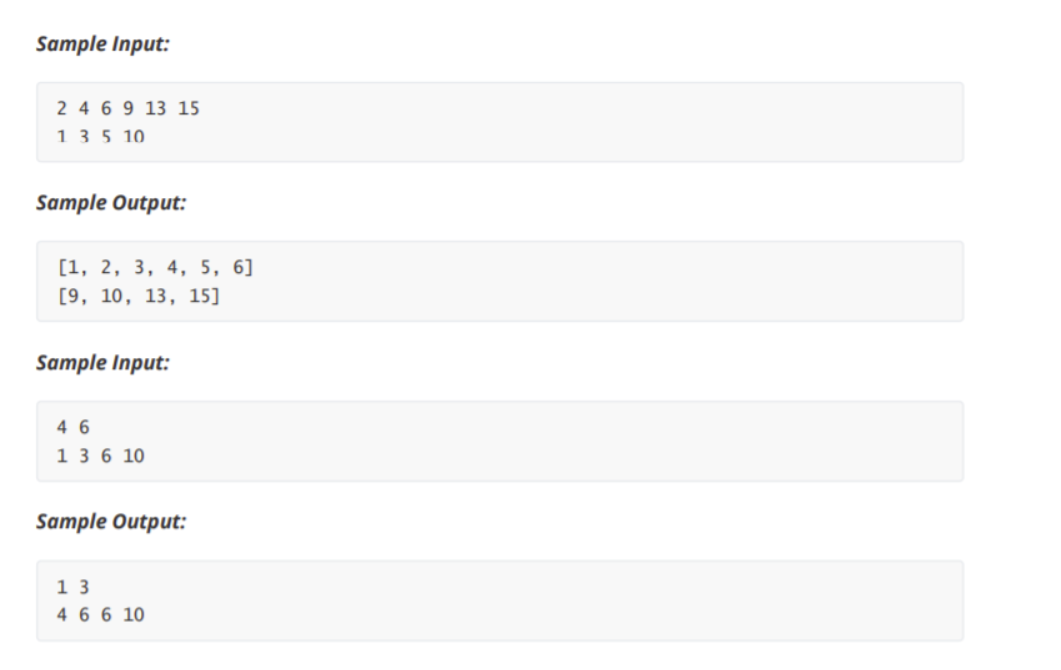

In [ ]:
# Solution

def mergeInPlace(A,B):
    (a,b) = (len(A), len(B))
    if a > b:
        for i in range(b):
            for j in range(a):
                if A[j] > B[i]:
                    A.swap(j,B,i)
                
        
        for i in range(b):
            for j in range(i+1,b):
                if B[i] > B[j]:
                    B.swap(i,B,j)
        return (A, B)
    
    elif a < b:
        for i in range(b):
            for j in range(a):
                if A[j] > B[i]:
                    A.swap(j,B,i)
                    
        for i in range(b):
            for j in range(i+1,b):
                if B[i] > B[j]:
                    B.swap(i,B,j)
        return (A, B)
        
    elif a == b:
        for i in range(a):
            for j in range(b):
                if A[i] > B[j]:
                    A.swap(i,B,j)
                
        for i in range(b):
            for j in range(i+1,b):
                if B[i] > B[j]:
                    B.swap(i,B,j)
        return (A, B)

In [ ]:
# Approch -2

#python
def mergeInPlace(A, B):
  m = len(A)
  n = len(B)
  if (m < 1 or n < 1):
    return 
  
  # Find the smaller list of A and B.
  for i in range(0, m):
    # A and B are already sorted. B[0] will always be least in B, 
    # as we will maintain its sortedness .
    if (A[i] > B[0]):
      A.swap(i, B, 0)
       
      # move `B[0]` to its correct position in B to maintain the sortedness of B
      j = 0
      while(j < n - 1 and B[j] > B[j + 1]):
        B.swap(j+1, B, j)        
        j += 1

# Live Coding-Problem 1

Consider a list students of tuples, where each tuple contains the first name(string) and roll
number(int) of a student. Write a Python function sortTuples(students) to sort the list by roll
numbers in ascending order.

**For example**
> students = [("Ram", 104), ("Sam", 101), ("Sita", 103), ("Ram", 207)]

> after running sortTuples(students) , the list should be

> students = [("Sam", 101), ("Sita", 103), ("Ram", 104), ("Ram", 207)]
 
 > Do not return anything from the function, just sort the list students using any sorting technique
of your choice.


In [ ]:
def InsertionSort(L):
  n = len(L)
  if n < 1:
    return(L)
  for i in range(n):
    # Assume L[:i] is sorted
    # Move L[i] to correct position in L
    j = i
    while(j > 0 and L[j] < L[j-1]):
      (L[j],L[j-1]) = (L[j-1],L[j])
      j = j-1
      # Now L[:i+1] is sorted
  return(L)

In [ ]:
def sortstu(l):
  length = len(l)
  if length < 1:
    return (l)
  for i in range(length):
    j = i
    while(j>0 and l[j][1] < l[j-1][1]):
      (l[j], l[j-1]) = (l[j-1], l[j])
      j = j-1
  return l


In [ ]:
s = []
n = int(input())
for i in range(n):
  data = input().split()
  s.append((data[0], int(data[1])))
sortstu(s)
for item in s:
  print(*item)

5
Jeff 3715
Manuel 3186
Cliff 3035
Nikolai 3006
Thurman 2842
Thurman 2842
Nikolai 3006
Cliff 3035
Manuel 3186
Jeff 3715


# Live Coding-Problem 2
> Write a Python function findIntersection(L1, L2) that accepts two integer lists L1 and L2
and return a list that contains elements that are common to both lists. Try to write a solution that runs in O(nlogn) time.

> L1 contains all distinct integers and L2 contains all distinct integers, but there can be many
elements common between L1 and L2 .

> List L1 intersection L2 contains all elements that are common to L1 and L2 . The elements in
the returned list can be in any order.

**For example.**

if L1 = [5, 8, 2] and L2 = [6, 8] then, findIntersection(L1, L2) should return list [8]
if L1 = [3, 7, 2, 9, 5] and L2 = [6, 3, 7, 5] then, findIntersection(L1, L2) should return list [3,
7, 5]

In [ ]:
def binarysearch(v,l):
  if l == []:
    return(False)
  m = len(l)//2

  if v == l[m]:
    return(True)
  if v < l[m]:
    return(binarysearch(v,l[:m]))
  else:
    return(binarysearch(v,l[m+1:]))

In [ ]:
def binarySearch(L,K):
  if L == []:
    return False
  m = len(L)//2

  if K == L[m]:
    return True
  
  if K < L[m]:
    return (binarySearch(L[:m],K))
  
  else:
    return (binarySearch(L[m+1:],K))

def findIntersection(L1, L2):
  L1.sort()
  L3 = []
  for item in L2:
    if (binarySearch(L1, item == True)):
      L3.append(item)
  return L3


In [ ]:
# Approch 2

def binarySearch(L, k):
  s = len(L)
  if(s < 1):
    return False
  left = 0
  right = s - 1
  while(left <= right):
    mid = (left + right)//2
    if (k == L[mid]):
      return True
    elif (k < L[mid]):
      right = mid - 1
    else:
      left = mid + 1
      return False
def findIntersection(L1, L2):
  L1.sort()
  L3 = []
  for item in L2:
    if (binarySearch(L1, item) == True):
      L3.append(item)
  return L3


In [ ]:
set1 = [int(item) for item in input().split()]
set2 = [int(item) for item in input().split()]
result = findIntersection(set1, set2)
result.sort()
print(*result)

13 27 92 63 69 24 98 89 46 43 35 76 97 18 16 28 17 78 64 14
84 2 51 73 94 93 70 23 72 98 91 36 16 35 64 24 17 53 59 12



# Live Coding-Problem 4

Given a list L of random numbers and another number pairSum , find whether there exists two
numbers in the list such that their sum is equal to pairSum . Complete the below Python function
**findPair(L, pairSum)** that performs this operation. Try to write a solution which is or
better.
> Hint: Try to sort the list first.

In [ ]:
def findPair(L, x):
  L.sort()
  left = 0
  right = len(L) - 1
  while(left < right):
    sum = L[left] + L[right]
    if (sum == x):
      return True
    elif (sum > x):
      right -= 1
    else:
      left += 1
  return False


**Live Coding-Problem 5**

> Write a Python function listUnion(L1, L2) that accepts two integer lists L1 and L2 and return
a list that is the union( L1 U L2 ) of the two lists and is sorted in ascending order. Try to write a
solution that runs in O(n log n) time.

> L1 contains all distinct integers and L2 contains all distinct integers, but there can be many
elements common between L1 and L2 .

> List L1 U L2 contains all distinct elements of L1 and L2 combined, and is sorted in ascending
order.

**Sample Input 1**

> 5 8 2

> 6 8

**Output**

> 2 5 6 8






In [ ]:
def findUnion(L1, L2):
  L1.sort()
  L2.sort()
  L3 = []

  s1 = len(L1)
  s2 = len(L2)

  p1 = p2 = 0

  while (p1<s1 and p2<s2):
    if (L1[p1] == L2[p2]):
      L3.append(L1[p1])
      p1+=1
      p2+=1
    elif (L1[p1] < L2[p2]):
      L3.append(L1[p1])
      p1+=1
    else:
      L3.append(L2[p2])
      p2+=1
  while(p1<s1):
    L3.append(L1[p1])
    p1+=1

  while(p2<s2):
    L3.append(L2[p2])
    p2+=1
  return L3


